# Project: classification of bank clients

# <p style="border:3px solid DodgerBlue;text-align:center;font-size:100%;">0. Introduction</p>
<div class="alert alert-info" role="alert">
    
<center> <img src="https://m.bankingexchange.com/media/k2/items/cache/cb89cba7f71671166c60733a6bf01429_M.jpg?t=20190514_203553"> 
    
  WHAT CASE DO WE DECIDE?   
   
We were provided with data on the latest marketing campaign conducted by the bank: the task was to attract customers to open a deposit. We must analyze this data, identify patterns and find the decisive factors that influenced the fact that the client invested money in this particular bank. If we can do this, we will raise the bank's income and help understand the target audience that needs to be attracted through advertising and various offers.
    
Let's look at the data that we have to work with.
    
    
<table >
   <tr>
    <th>Column</th>
    <th>Description</th>
  </tr>
  
   <tr>
    <td>age</td>
    <td>age </td>
  </tr>
    
   <tr>
    <td>marital</td>
    <td>marital status </td>
  </tr> 
    
  <tr>
    <td>education</td>
    <td>level of education</td>
  </tr>
    
  <tr>
    <td>default</td>
    <td>whether a client has an overdue loan </td>
  </tr>
    
   <tr>
    <td>housing</td>
    <td>whether a client has a housing loan</td>
  </tr>
    
   <tr>
    <td>loan</td>
    <td>whether a client has a consumer loan </td>
  </tr>
    
   <tr>
    <td>balance </td>
    <td>current balance </td>
  </tr> 
   
   <tr>
    <td>contact </td>
    <td>type of contact with a client </td>
  </tr>  
    
   <tr>
    <td>month </td>
    <td>a month in which last contact was made </td>
  </tr>  
    
   <tr>
    <td>day</td>
    <td>a day when the last contact was made </td>
  </tr> 
    
   <tr>
    <td>duration</td>
    <td>contact duration in seconds </td>
  </tr> 
    
  <tr>
    <td>campaign</td>
    <td>a number of contacts with this client during the current campaign </td>
  </tr> 
    
   <tr>
    <td>pdays</td>
    <td>a number of days missed from the last marketing campaign to the contact in the current campaign </td>
  </tr> 
    
   <tr>
    <td>previous</td>
    <td>number of contacts before the current campaign </td>
  </tr> 
    
   <tr>
    <td>poutcome</td>
    <td>the result of a past marketing campaign</td>
  </tr> 
    
   <tr>
    <td>deposit</td>
    <td>our target variable is deposit, which determines whether the client agrees to open a deposit with the bank. This is what we will try to predict in this case. </td>
  </tr> 
    
</table>
    
</div>

# <p style="border:3px solid DodgerBlue;text-align:center;font-size:100%;">1. Uploading and analysing of datasets</p> 
<h2>1.1. Import libraries</h2> 

In [617]:
import pandas as pd # management of dataframes
import numpy as np # math

# Graphs and plots
import matplotlib.pyplot as plt
import seaborn as sns

# Additional libraries
import sweetviz as sv
from ydata_profiling import ProfileReport
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

# Machine learning libraries
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import optuna


<h2 >1.2. Fixing</h2> 

In [618]:
# commiting the package version to make the experiments repeatable:
!pip freeze > requirements.txt

<h2 >1.3. Import and review of dataset</h2> 

In [619]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')

    We can start with abscent values. Seems like there are only 25 missing values in 'Balance' column. But further we will need to check if some of missing values have not been hidden under other names.

In [620]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [621]:
df.describe(include='all')

age         job  marital  education default balance housing  \
count   11162.000000       11162    11162      11162   11162   11137   11162   
unique           NaN          12        3          4       2    3802       2   
top              NaN  management  married  secondary      no   0  $       no   
freq             NaN        2566     6351       5476   10994     774    5881   
mean       41.231948         NaN      NaN        NaN     NaN     NaN     NaN   
std        11.913369         NaN      NaN        NaN     NaN     NaN     NaN   
min        18.000000         NaN      NaN        NaN     NaN     NaN     NaN   
25%        32.000000         NaN      NaN        NaN     NaN     NaN     NaN   
50%        39.000000         NaN      NaN        NaN     NaN     NaN     NaN   
75%        49.000000         NaN      NaN        NaN     NaN     NaN     NaN   
max        95.000000         NaN      NaN        NaN     NaN     NaN     NaN   

         loan   contact           day  month      duration      campaign  \
count   11162     11162  11162.000000  11162  11162.000000  11162.000000   
unique      2         3           NaN     12           NaN           NaN   
top        no  cellular           NaN    may           NaN           NaN   
freq     9702      8042           NaN   2824           NaN           NaN   
mean      NaN       NaN     15.658036    NaN    371.993818      2.508421   
std       NaN       NaN      8.420740    NaN    347.128386      2.722077   
min       NaN       NaN      1.000000    NaN      2.000000      1.000000   
25%       NaN       NaN      8.000000    NaN    138.000000      1.000000   
50%       NaN       NaN     15.000000    NaN    255.000000      2.000000   
75%       NaN       NaN     22.000000    NaN    496.000000      3.000000   
max       NaN       NaN     31.000000    NaN   3881.000000     63.000000   

               pdays      previous poutcome deposit  
count   11162.000000  11162.000000    11162   11162  
unique           NaN           NaN        4       2  
top              NaN           NaN  unknown      no  
freq             NaN           NaN     8326    5873  
mean       51.330407      0.832557      NaN     NaN  
std       108.758282      2.292007      NaN     NaN  
min        -1.000000      0.000000      NaN     NaN  
25%        -1.000000      0.000000      NaN     NaN  
50%        -1.000000      0.000000      NaN     NaN  
75%        20.750000      1.000000      NaN     NaN  
max       854.000000     58.000000      NaN     NaN

<h2>1.4. Cheking dataset for outliers, duplicates and missing values</h2> 

    As expected in 'Job' and 'Education' columns we can see 'unknown' values. Probably should change them during feature engineering.

In [622]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [623]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

### 1.4.1 'Balance' feature


    We have found missing values, and we would like to process them now. However, we cannot do this, since not all data is presented in the correct form.

    Pay attention to the balance sign: the data contains an extra comma and a dollar sign. For this reason, this feature is not read as a number. Have to process this feature data so that it is converted to a float.


In [624]:
def get_float_balance(value):
    if isinstance(value, float) is False:
        clean_value = value.replace(' ', '').replace(',', '.').replace('$', '')
        return float(clean_value)
    else:
        return value
    
df['balance'] = df['balance'].apply(get_float_balance)
df['balance'] = df['balance'].astype('float')


    So, values in the 'balance' feature have float type, and now we can process the gaps that are present in it. Of course, the gaps could simply be removed, but we will do it differently: we will replace the gaps with the median value for this feature.

In [625]:
df['balance'] = df['balance'].fillna(df['balance'].median())

    Earlier, we found out that there are missing values in the job attribute that are not explicitly displayed as NaN. However, it is still important for us to process them. We know that for categorical features, missing values are replaced by the mode for the given feature.


In [626]:
df['job'] = df['job'].apply(
    lambda x: df['job'].mode()[0] if x == 'unknown' else x)
df['education'] = df['education'].apply(
    lambda x: df['education'].mode()[0] if x == 'unknown' else x)

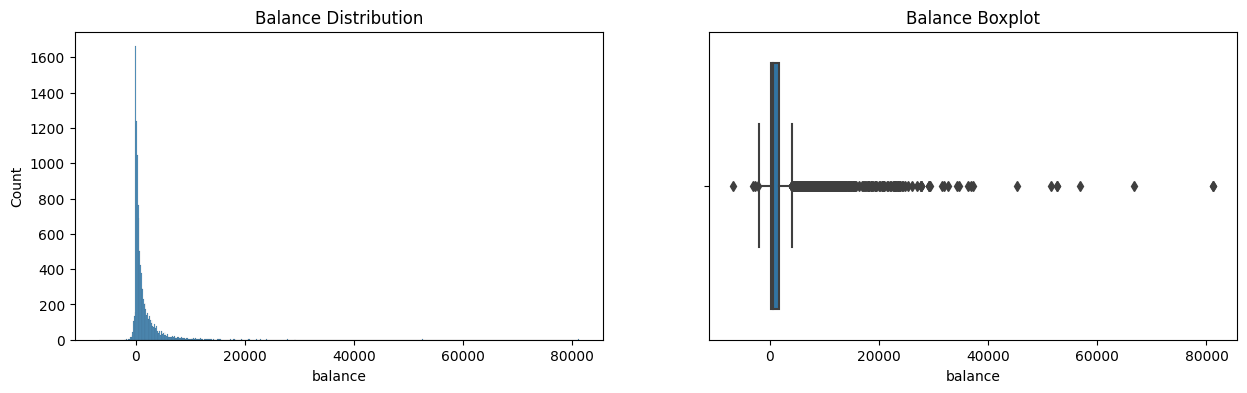

In [627]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='balance', ax=axes[0]);
histplot.set_title('Balance Distribution');
boxplot = sns.boxplot(data=df, x='balance', ax=axes[1]);
boxplot.set_title('Balance Boxplot');

    We can notice a number of outliers detected after 20000 balance boarder.

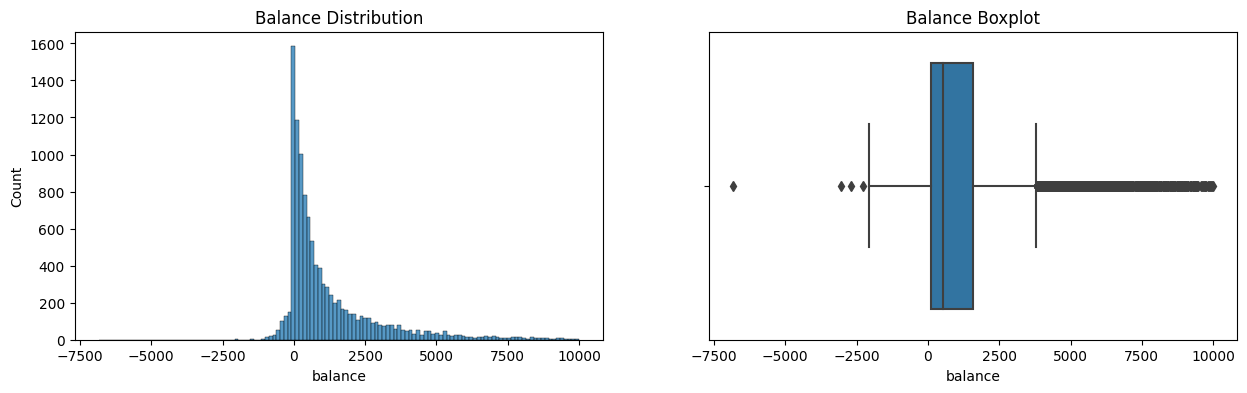

In [628]:
out_balance = df[df['balance'] < 10000]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=out_balance, x='balance', ax=axes[0]);
histplot.set_title('Balance Distribution');
boxplot = sns.boxplot(data=out_balance, x='balance', ax=axes[1]);
boxplot.set_title('Balance Boxplot');

    It's hard to characterise balance distribution as normal or at least symmetric. However we can use log function to update it. But before finding logarithm we have to make all values positive. I'll summarize the minimum balance value with all others. Here's result:

In [629]:
df['balance'].min()

-6847.0

In [630]:
df['balance'] = df['balance'].apply(lambda x: x + 6847)


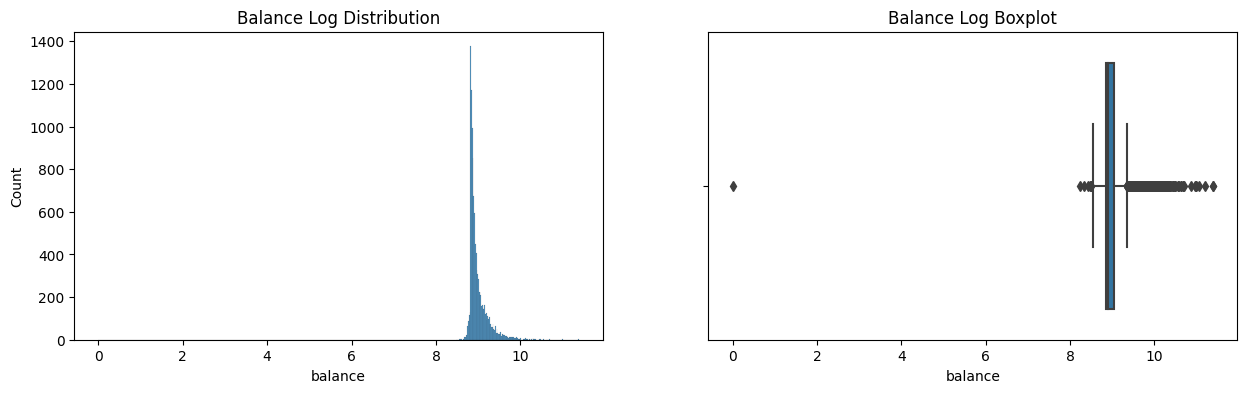

In [631]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x=np.log(df['balance']+1), ax=axes[0]);
histplot.set_title('Balance Log Distribution');
boxplot = sns.boxplot(data=df, x=np.log(df['balance']+1), ax=axes[1]);
boxplot.set_title('Balance Log Boxplot');

    Now we can process outliers in 'balance' feature. I'll use Interquartile range method and Three-sigma method. 

## Interquartile range method

### Method algorythm:

1. Calculate the 25th and 75th quantiles (1st and 3rd quartiles) - $Q_{25}$ and $Q_{75}$ for the reviewed feature.
2. Calculate interquartile distance: 
    * $IQR=Q_{75}-Q_{25}$
3. Determine the upper and lower Tukey bounds:

    * $bound_{upper} = Q_{75} + 1.5*IQR$
    
    * $bound_{lower} = Q_{25} - 1.5*IQR$
4. Find observations that are out of bounds

## Three-sigma method (Z-score)

Three-sigma method rule states that if the data distribution is normal, then 99.73% lie in the interval: $(\mu-3 \sigma$ , $\mu+3 \sigma)$, 
where  
* $\mu$ - mathematical expectation (in our case it is  mean value).
* $\sigma$ - standard deviation. 

Observations that lie outside this interval will be considered outliers.

### **Method algorythm:**

1. Calculate mean and standard deviation of $\mu$ и $\sigma$ for the examined feature.
2. Define upper and lower bounds:
    * $bound_{upper} = \mu - 3 * \sigma$
    
    * $bound_{lower} = \mu + 3 * \sigma$
3. Find observations that are out of bounds.

    I'll start with Interquartile range method.

In [632]:
def find_outliers_iqr(data, feature, left=1.5, right=1.5, log_scale=False):
    """
    Finds outliers in data using the interquartile range method.
    The classic method is modified by adding:
    * Possibility of logarithm distribution
    * manual control of the number of interquartile ranges in both directions of the distribution
    Args:
        data(pandas.DataFrame): dataset
        feature (str): name of the feature based on which outliers are searched
        left (float, optional): number of interquartile ranges to the left of the distribution. The default is 1.5.
        right (float, optional): number of interquartile ranges to the right side of the distribution. The default is 1.5.
        log_scale (bool, optional): logarithm mode. Default is False - no logarithm is applied.

    returns:
        pandas.DataFrame: outlier observations
        pandas.DataFrame: cleaned up data with outliers removed
    """
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>=lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = find_outliers_iqr(df, 'balance', log_scale=True)

print(f'Number of outliers: {outliers.shape[0]}')
print(f'Remaining data (cleaned): {cleaned.shape[0]}')

Number of outliers: 840
Remaining data (cleaned): 10322


    Now we can check how our cleaned data looks like.

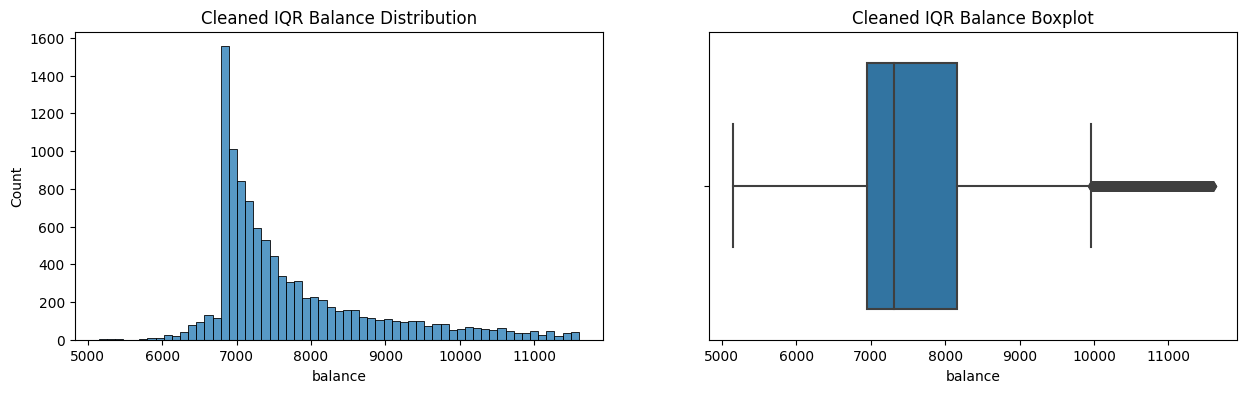

In [633]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='balance', ax=axes[0]);
histplot.set_title('Cleaned IQR Balance Distribution');
boxplot = sns.boxplot(data=cleaned, x='balance', ax=axes[1]);
boxplot.set_title('Cleaned IQR Balance Boxplot');

    Now I'll apply Three sigma method:

In [634]:
def find_outliers_z_score(data, feature, left=3, right=3, log_scale=False):
    """
    Finds outliers in data using the z-score method.
    The classic method is modified by adding:
    * Possibility of logarithm distribution
    * manual control of the number of standard deviations in both sides of the distribution
    Args:
        data(pandas.DataFrame): dataset
        feature (str): name of the feature based on which outliers are searched
        left (float, optional): number of standard deviations to the left of the distribution. The default is 1.5.
        right (float, optional): number of standard to the right side of the distribution. The default is 1.5.
        log_scale (bool, optional): logarithm mode. Default is False - no logarithm is applied.

    returns:
        pandas.DataFrame: outlier observations
        pandas.DataFrame: cleaned up data with outliers removed
    """
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers_z, cleaned_z = find_outliers_z_score(df, 'balance', log_scale=True)

print(f'Number of outliers: {outliers_z.shape[0]}')
print(f'Remaining data (cleaned): {cleaned_z.shape[0]}')

Number of outliers: 209
Remaining data (cleaned): 10953


    Visualizing result as well.

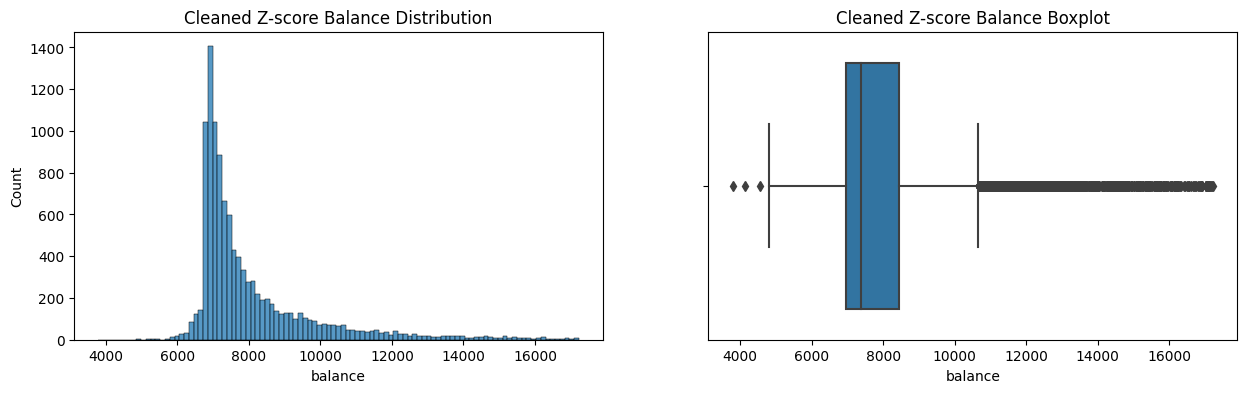

In [635]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned_z, x='balance', ax=axes[0]);
histplot.set_title('Cleaned Z-score Balance Distribution');
boxplot = sns.boxplot(data=cleaned_z, x='balance', ax=axes[1]);
boxplot.set_title('Cleaned Z-score Balance Boxplot');

    Additionally we can visualise how both methods worked. We can write a comprehensive function for that:

(<AxesSubplot: title={'center': 'balance distribution with Interquartile range method'}, xlabel='balance', ylabel='Count'>,
 <AxesSubplot: title={'center': 'balance distribution with Z-score method'}, xlabel='balance', ylabel='Count'>)

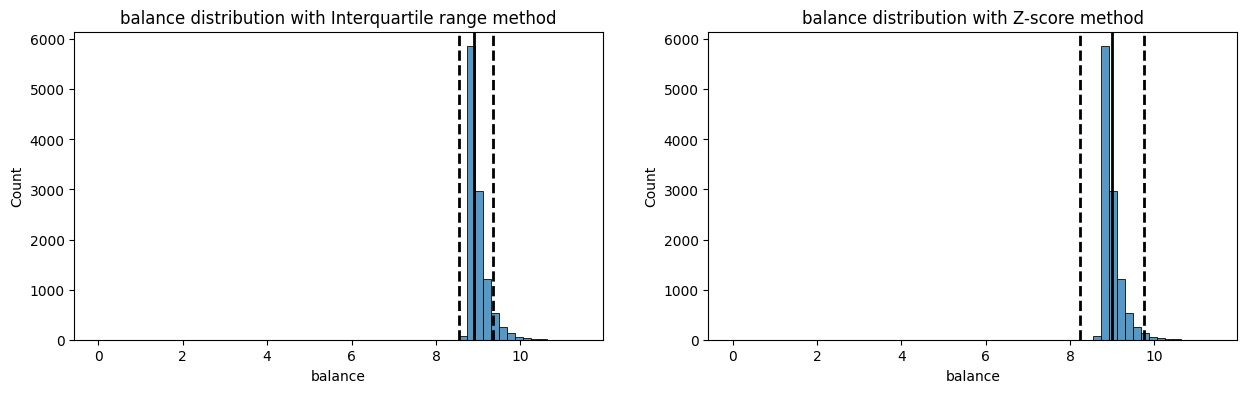

In [636]:
def outliers_iqr_z_visualize(df, feature, iqr_left=1.5, iqr_right=1.5, z_left=3, z_right=3, log_scale=False):
    """
    Returns 2 histplots with indication of outliers using the interquartile range and z-score method.
    The classic method is modified by adding:
    * Possibility of logarithm distribution
    * manual control of distribution borders
    Args:
        data(pandas.DataFrame): dataset
        feature (str): name of the feature based on which outliers are searched
        iqr_left (float, optional): number of interquartile ranges to the left of the distribution. The default is 1.5.
        iqr_right (float, optional): number of interquartile ranges to the right of the distribution. The default is 1.5.
        z_left (float, optional): number of standard deviations to the left of the distribution. The default is 3.
        z_right (float, optional): number of standard deviations to the right of the distribution. The default is 3.       
        log_scale (bool, optional): logarithm mode. Default is False - no logarithm is applied.

    returns:
        seaborn.histplot: outlier visualization for IQR method
        seaborn.histplot: outlier visualization for Z-score method
    """
    if log_scale:
        key_feature = np.log(df[feature] + 1)
    else:
        key_feature = df[feature]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    histplot_iqr = sns.histplot(key_feature, bins=60, ax=ax[0]);
    histplot_iqr.axvline(key_feature.quantile(0.50), color='k', lw=2)
    histplot_iqr.axvline(
        (key_feature.quantile(0.25) - ((key_feature.quantile(0.75)-key_feature.quantile(0.25)) * iqr_left)), 
        color='k', 
        ls='--', 
        lw=2)
    histplot_iqr.axvline(
        (key_feature.quantile(0.75) + ((key_feature.quantile(0.75)-key_feature.quantile(0.25)) * iqr_right)), 
        color='k', 
        ls='--', 
        lw=2)
    histplot_iqr.set_title(f'{feature} distribution with Interquartile range method');

    histplot_z = sns.histplot(key_feature, bins=60, ax=ax[1])
    histplot_z.axvline(key_feature.mean(), color='k', lw=2)
    histplot_z.axvline(key_feature.mean() + z_right *key_feature.std(), color='k', ls='--', lw=2)
    histplot_z.axvline(key_feature.mean() - z_left *key_feature.std(), color='k', ls='--', lw=2)
    histplot_z.set_title(f'{feature} distribution with Z-score method');
    return histplot_iqr, histplot_z;
    

outliers_iqr_z_visualize(df, 'balance', log_scale=True)

    Interquartile range method has more narrow borders and we found more outliers using it. Further I'll use data cleaned with this method.

    The skewness of the distribution is strong and left-handed. This can be verified by calculating the asymmetry coefficient:

In [637]:
print(np.log(df['balance']+1).skew())

-1.6732097353032382


    I'll return initial balance values to the cleaned data. 

In [638]:
cleaned['balance'] = cleaned['balance'].apply(lambda x: x - 6847)

### 1.4.2 'Duration' feature

    After that I'll use the same methods to outliers in 'Duration' feature.

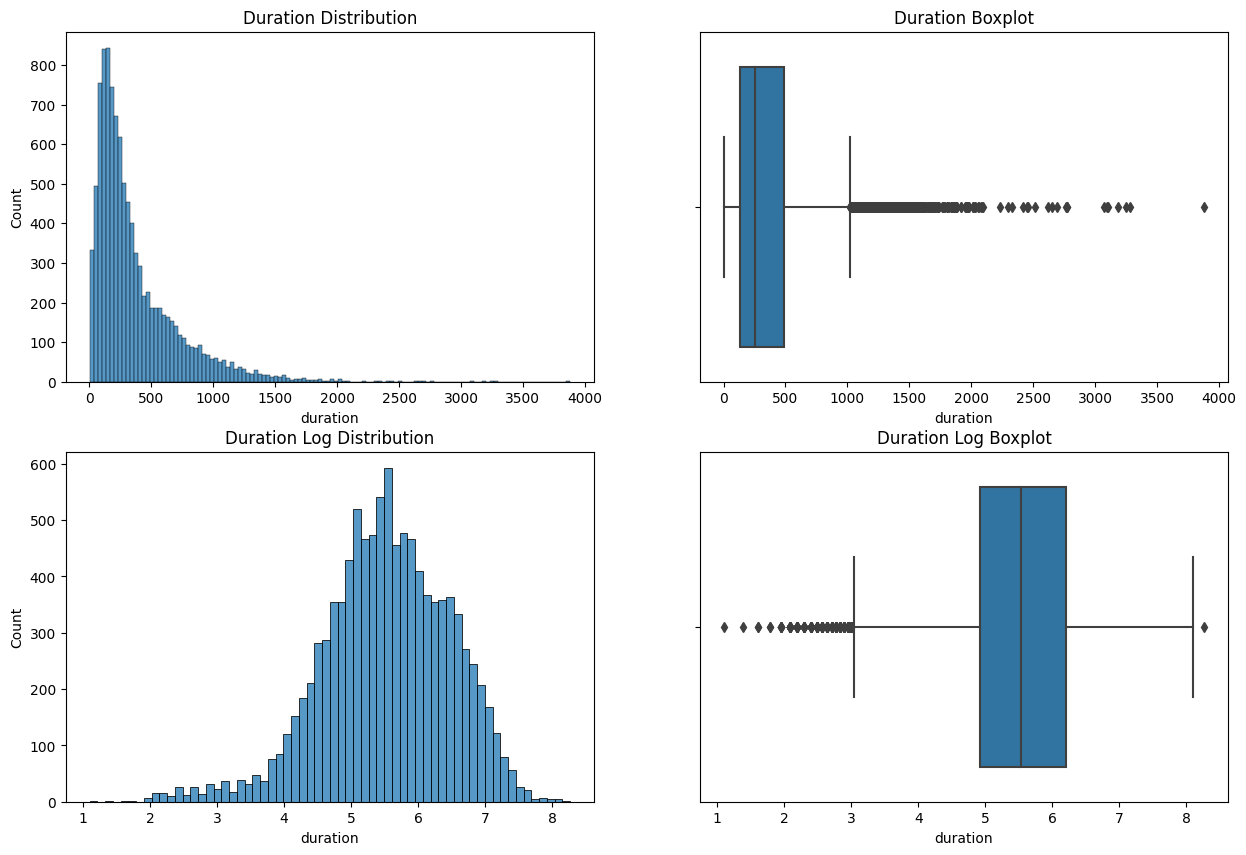

In [639]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
histplot = sns.histplot(data=cleaned, x='duration', ax=axes[0][0]);
histplot.set_title('Duration Distribution');
boxplot = sns.boxplot(data=cleaned, x='duration', ax=axes[0][1]);
boxplot.set_title('Duration Boxplot');
histplot = sns.histplot(data=cleaned, x=np.log(cleaned['duration']+1), ax=axes[1][0]);
histplot.set_title('Duration Log Distribution');
boxplot = sns.boxplot(data=cleaned, x=np.log(cleaned['duration']+1), ax=axes[1][1]);
boxplot.set_title('Duration Log Boxplot');

    As Duration Log Distribution is more of a Gaussian type we'll use outliers' detection methods on it.

In [640]:
outliers_dur_iqr, cleaned_dur_iqr = find_outliers_iqr(cleaned, 'duration', log_scale=True)

print(f'Number of outliers: {outliers_dur_iqr.shape[0]}')
print(f'Remaining data (cleaned): {cleaned_dur_iqr.shape[0]}')

Number of outliers: 179
Remaining data (cleaned): 10143


In [641]:
outliers_dur_z, cleaned_dur_z = find_outliers_z_score(cleaned, 'duration', log_scale=True)

print(f'Number of outliers: {outliers_dur_z.shape[0]}')
print(f'Remaining data (cleaned): {cleaned_dur_z.shape[0]}')

Number of outliers: 105
Remaining data (cleaned): 10217


(<AxesSubplot: title={'center': 'duration distribution with Interquartile range method'}, xlabel='duration', ylabel='Count'>,
 <AxesSubplot: title={'center': 'duration distribution with Z-score method'}, xlabel='duration', ylabel='Count'>)

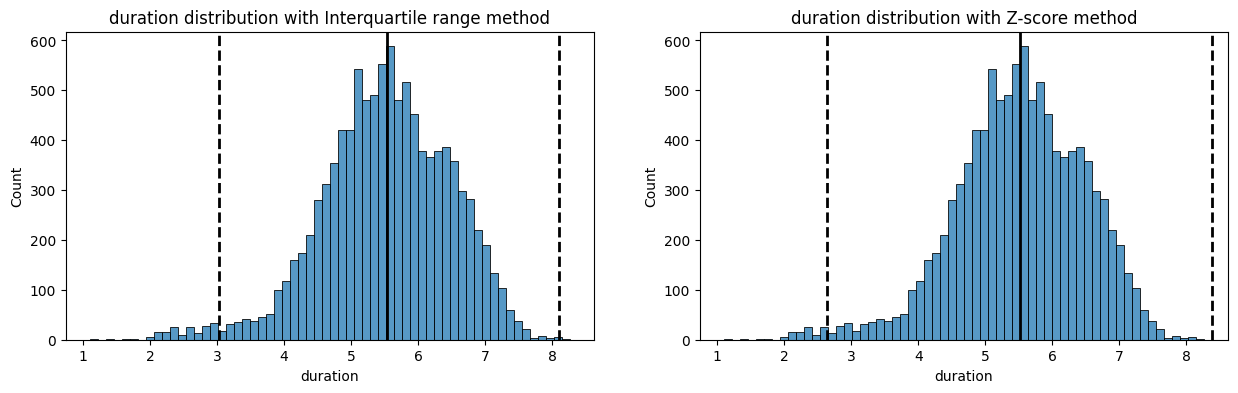

In [642]:
outliers_iqr_z_visualize(cleaned, 'duration', log_scale=True)

    In this case I'll also keep it with IQR method.

In [643]:
cleaned = cleaned_dur_iqr

### 1.4.3 'Campaign' feature

(<AxesSubplot: title={'center': 'campaign distribution with Interquartile range method'}, xlabel='campaign', ylabel='Count'>,
 <AxesSubplot: title={'center': 'campaign distribution with Z-score method'}, xlabel='campaign', ylabel='Count'>)

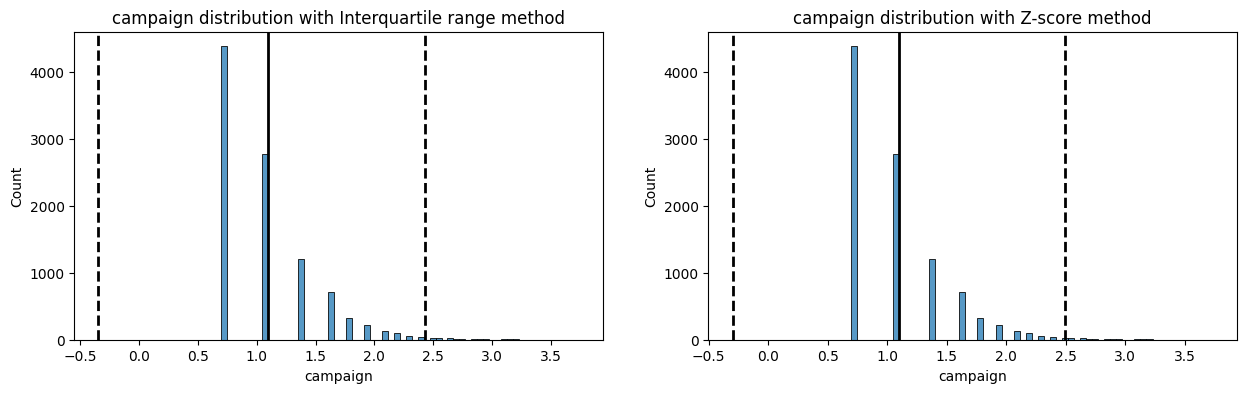

In [644]:
outliers_iqr_z_visualize(cleaned, 'campaign', log_scale=True)

In [645]:
outliers_cam_iqr, cleaned_cam_iqr = find_outliers_iqr(cleaned, 'campaign', log_scale=True)

print(f'Number of outliers: {outliers_cam_iqr.shape[0]}')
print(f'Remaining data (cleaned): {cleaned_cam_iqr.shape[0]}')

Number of outliers: 162
Remaining data (cleaned): 9981


In [646]:
outliers_cam_z, cleaned_cam_z = find_outliers_z_score(cleaned, 'campaign', log_scale=True)

print(f'Number of outliers: {outliers_cam_z.shape[0]}')
print(f'Remaining data (cleaned): {cleaned_cam_z.shape[0]}')

Number of outliers: 130
Remaining data (cleaned): 10013


In [647]:
cleaned = cleaned_cam_z

### 1.4.4 'Pdays' feature

(<AxesSubplot: title={'center': 'pdays distribution with Interquartile range method'}, xlabel='pdays', ylabel='Count'>,
 <AxesSubplot: title={'center': 'pdays distribution with Z-score method'}, xlabel='pdays', ylabel='Count'>)

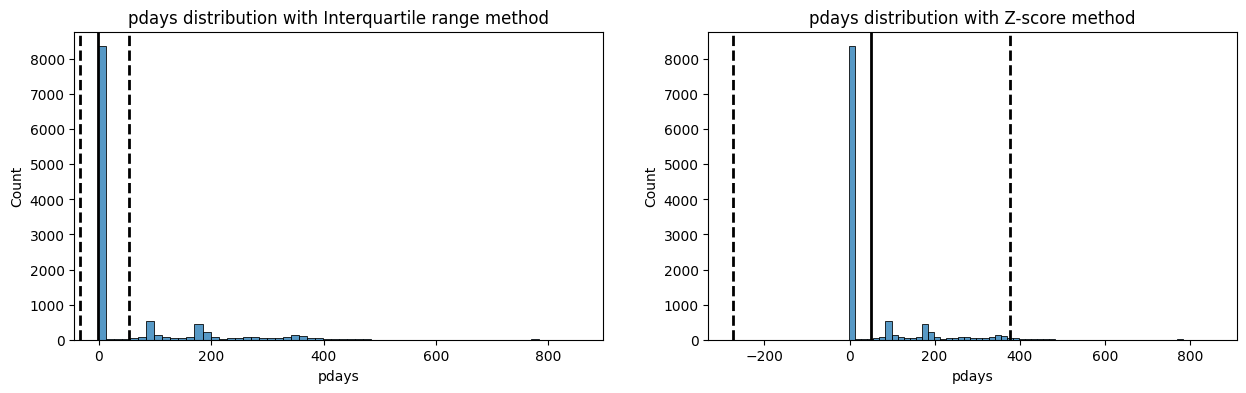

In [648]:
outliers_iqr_z_visualize(df, 'pdays', log_scale=False)

In [649]:
outliers_pd_iqr, cleaned_pd_iqr = find_outliers_iqr(cleaned, 'pdays', log_scale=False)

print(f'Number of outliers: {outliers_pd_iqr.shape[0]}')
print(f'Remaining data (cleaned): {cleaned_pd_iqr.shape[0]}')

Number of outliers: 2430
Remaining data (cleaned): 7583


In [650]:
outliers_pd_z, cleaned_pd_z = find_outliers_z_score(cleaned, 'pdays', log_scale=False)

print(f'Number of outliers: {outliers_pd_z.shape[0]}')
print(f'Remaining data (cleaned): {cleaned_pd_z.shape[0]}')

Number of outliers: 155
Remaining data (cleaned): 9858


In [651]:
cleaned = cleaned_pd_z

### 1.4.5 'Previous' feature

(<AxesSubplot: title={'center': 'previous distribution with Interquartile range method'}, xlabel='previous', ylabel='Count'>,
 <AxesSubplot: title={'center': 'previous distribution with Z-score method'}, xlabel='previous', ylabel='Count'>)

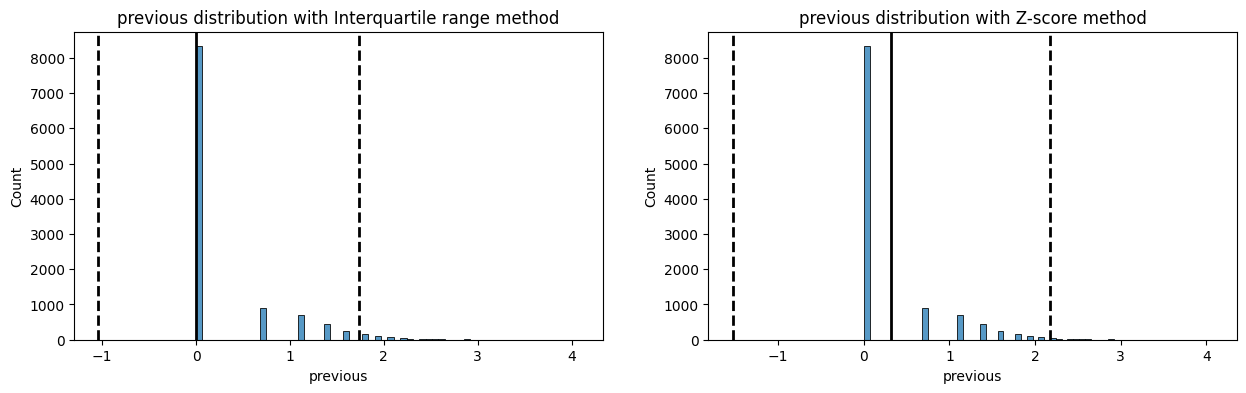

In [652]:
outliers_iqr_z_visualize(df, 'previous', log_scale=True)

In [653]:
outliers_pr_iqr, cleaned_pr_iqr = find_outliers_iqr(cleaned, 'previous', log_scale=True)

print(f'Number of outliers: {outliers_pr_iqr.shape[0]}')
print(f'Remaining data (cleaned): {cleaned_pr_iqr.shape[0]}')

Number of outliers: 2397
Remaining data (cleaned): 7461


In [654]:
outliers_pr_z, cleaned_pr_z = find_outliers_z_score(cleaned, 'previous', log_scale=True)

print(f'Number of outliers: {outliers_pr_z.shape[0]}')
print(f'Remaining data (cleaned): {cleaned_pr_z.shape[0]}')

Number of outliers: 188
Remaining data (cleaned): 9670


In [655]:
cleaned = cleaned_pr_z

    Checking if there are any duplicates.

In [656]:
mask_dupl = df.duplicated() 
data_duplicates = df[mask_dupl]
print(f'Number of found duplicates: {data_duplicates.shape[0]}')

Number of found duplicates: 0


# <p style="border:3px solid DodgerBlue;text-align:center;font-size:100%;">2. Exploratory data analysis</p> 

    As our aim to predict whether client will open deposit account or not firstly we need to check if target class is balanced.

no     5147
yes    4523
Name: deposit, dtype: int64

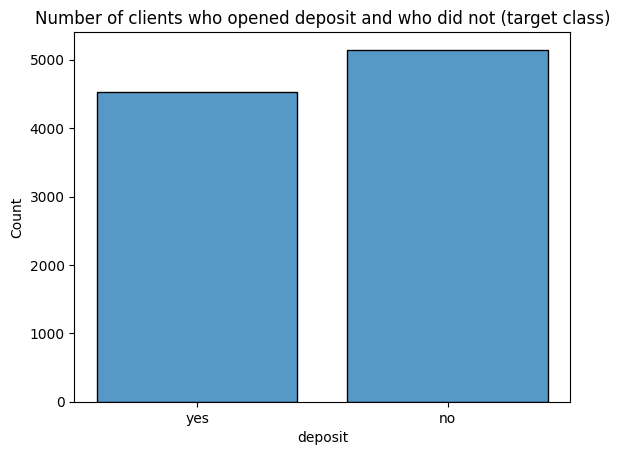

In [657]:
sns.histplot(cleaned, x='deposit', shrink=.8).set(title='Number of clients who opened deposit and who did not (target class)')

cleaned['deposit'].value_counts()

    Looks pretty balanced.

    Checking statistical data for numerical features.

In [658]:
cleaned.describe()

age      balance          day     duration     campaign  \
count  9670.000000  9670.000000  9670.000000  9670.000000  9670.000000   
mean     40.961117   883.498449    15.528335   378.283040     2.249431   
std      11.810827  1115.073463     8.419081   347.569956     1.729044   
min      18.000000 -1701.000000     1.000000    20.000000     1.000000   
25%      32.000000   100.000000     8.000000   143.000000     1.000000   
50%      38.000000   465.000000    15.000000   258.000000     2.000000   
75%      49.000000  1303.000000    21.000000   506.000000     3.000000   
max      93.000000  4752.000000    31.000000  3284.000000    11.000000   

             pdays     previous  
count  9670.000000  9670.000000  
mean     42.167115     0.585315  
std      91.655396     1.327572  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     378.000000     7.000000

In [659]:
def get_top_unique_values(df, level=0):
    """
    Function for obtaining information on unique values in features

    :param df: Dataframe to parse
    :param level: Uniqueness level in %, attributes below this level are not displayed
    :return: Returns a dataframe with the feature name, the number of unique values, the most frequently repeated 
    a unique value, how much % of the sample this value occupies, the number of repetitions
    """

    cols = list(df.columns)

    # создаём пустой список
    unique_list = []

    for col in cols:
        col_lev = round(df[col].value_counts(normalize=True).values[0] * 100, 2)

        if col_lev > level:
            item = (col, df[col].nunique(), df[col].value_counts(normalize=True).index[0], col_lev,
                    df[col].value_counts().values[0])
            # добавляем кортеж в список
            unique_list.append(item)

    unique_values = pd.DataFrame(
        unique_list,
        columns=['Column Name', 'Count Unique', 'Top Value', 'Top Value %', 'Top Value Count']
    )

    return unique_values

get_top_unique_values(cleaned)

Column Name  Count Unique   Top Value  Top Value %  Top Value Count
0          age            75          31         4.44              429
1          job            11  management        22.79             2204
2      marital             3     married        56.65             5478
3    education             3   secondary        54.20             5241
4      default             2          no        98.41             9516
5      balance          3058         0.0         7.37              713
6      housing             2          no        52.10             5038
7         loan             2          no        86.30             8345
8      contact             3    cellular        71.92             6955
9          day            31          18         4.84              468
10       month            12         may        26.19             2533
11    duration          1367          97         0.36               35
12    campaign            11           1        43.76             4232
13       pdays           346          -1        77.16             7461
14    previous             8           0        77.16             7461
15    poutcome             4     unknown        77.18             7463
16     deposit             2          no        53.23             5147

    Also we can use ProfileReport for quick analysis.

In [660]:
profile = ProfileReport(cleaned, title="Pandas Profiling Report")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

    Let's take a closer look to categorical and numerical features.

In [661]:
types = cleaned.dtypes
cat_features = list(types[(types == 'object')].index)
num_features = list(types[(types == 'float64') | (types == 'int64')].index)

    We can divide dataset into 2: 'Success' with clients who opened deposit and 'Failure' with those who did not.

In [662]:
# creating two datasets for those who opened deposit and who did not
success = cleaned[cleaned['deposit'] == 'yes']
failure = cleaned[cleaned['deposit'] == 'no']

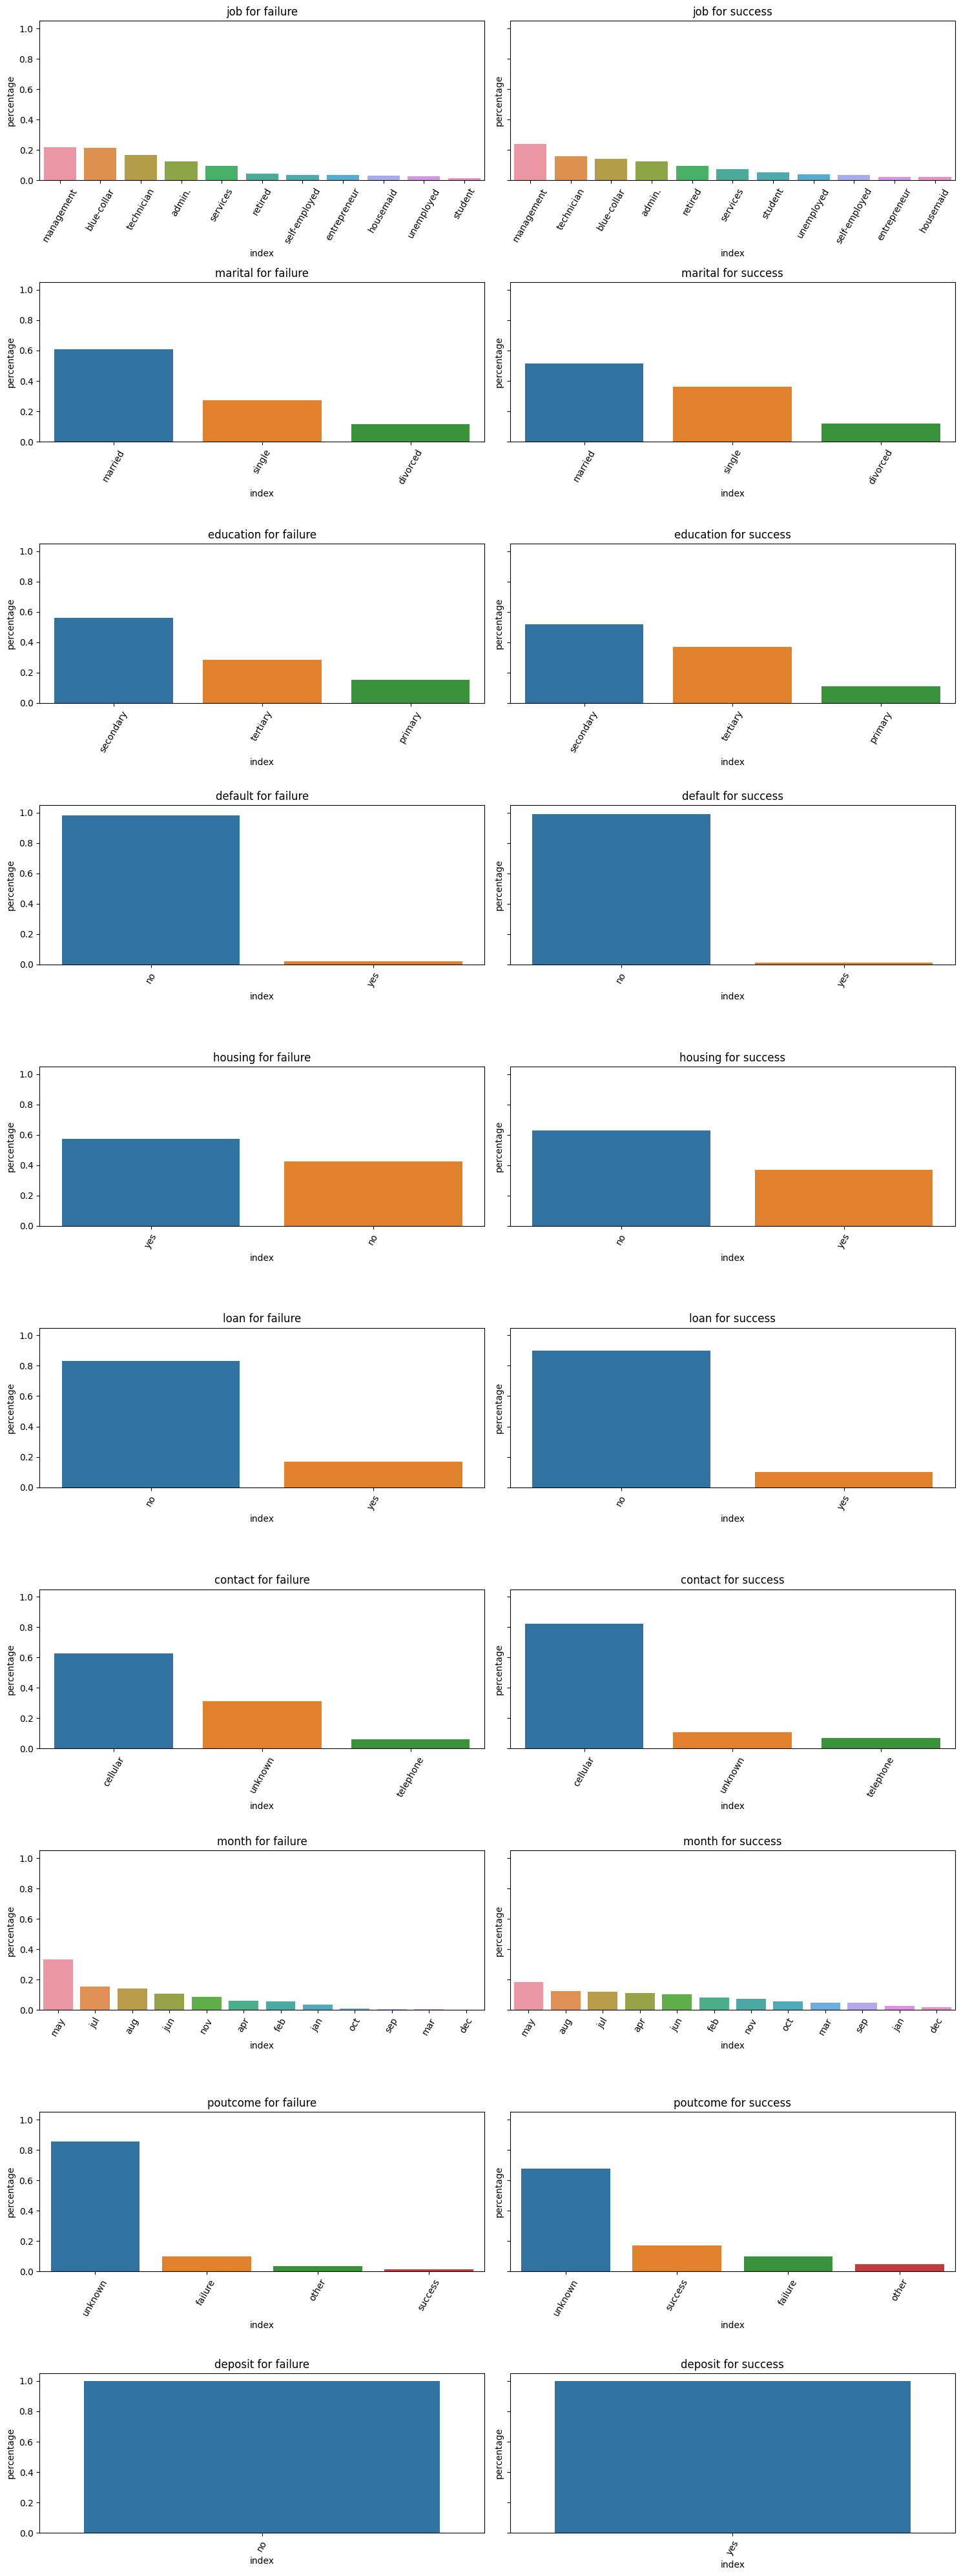

In [663]:
n = len(cat_features) #number of categorial features
fig, axes = plt.subplots(n, 2, figsize=(15, 40), sharey='all') #figure+n*2 coordinate axes with same y-scale
#creating cycle for categorial features
for i, feature in enumerate(cat_features):
    #building percented barplots for on the left for clients who did not open deposit (failure)
    count_data_f = (failure[feature].value_counts(normalize=True)
                  .sort_values(ascending=False)
                  .rename('percentage')
                  .reset_index())
    count_barplot = sns.barplot(
        data=count_data_f, 
        x='index', 
        y='percentage', 
        ax=axes[i][0]
        )
    count_barplot.xaxis.set_tick_params(rotation=60)
    count_barplot.set(title=f'{feature} for failure')
    #building percented barplots for on the right for clients who opened deposit (success)
    count_data_s = (success[feature].value_counts(normalize=True)
                  .sort_values(ascending=False)
                  .rename('percentage')
                  .reset_index())
    count_barplot = sns.barplot(
        data=count_data_s, 
        x='index', 
        y='percentage', 
        ax=axes[i][1]
        )
    count_barplot.xaxis.set_tick_params(rotation=60)
    count_barplot.set(title=f'{feature} for success')
plt.tight_layout() #alignment of features

### Key findings:
    - Singles tend to open deposit more often then married or divorced;
    - Clients with tertiary education open deposit more often;
    - Those clients who have housing or consumer loan less often open deposit;
    - If bank has cellullar number of a client there is bigger possibility that the client will 
    open deposit as cellular phone allows bigger opportunities.
    - Major part of contacts was made in spring and summer. 
    - Clients who agreed to use new banking services in the previous campaign are more 
    likely to make use of services in the new campaign.
     
    

    Now we shall compare numerical features.

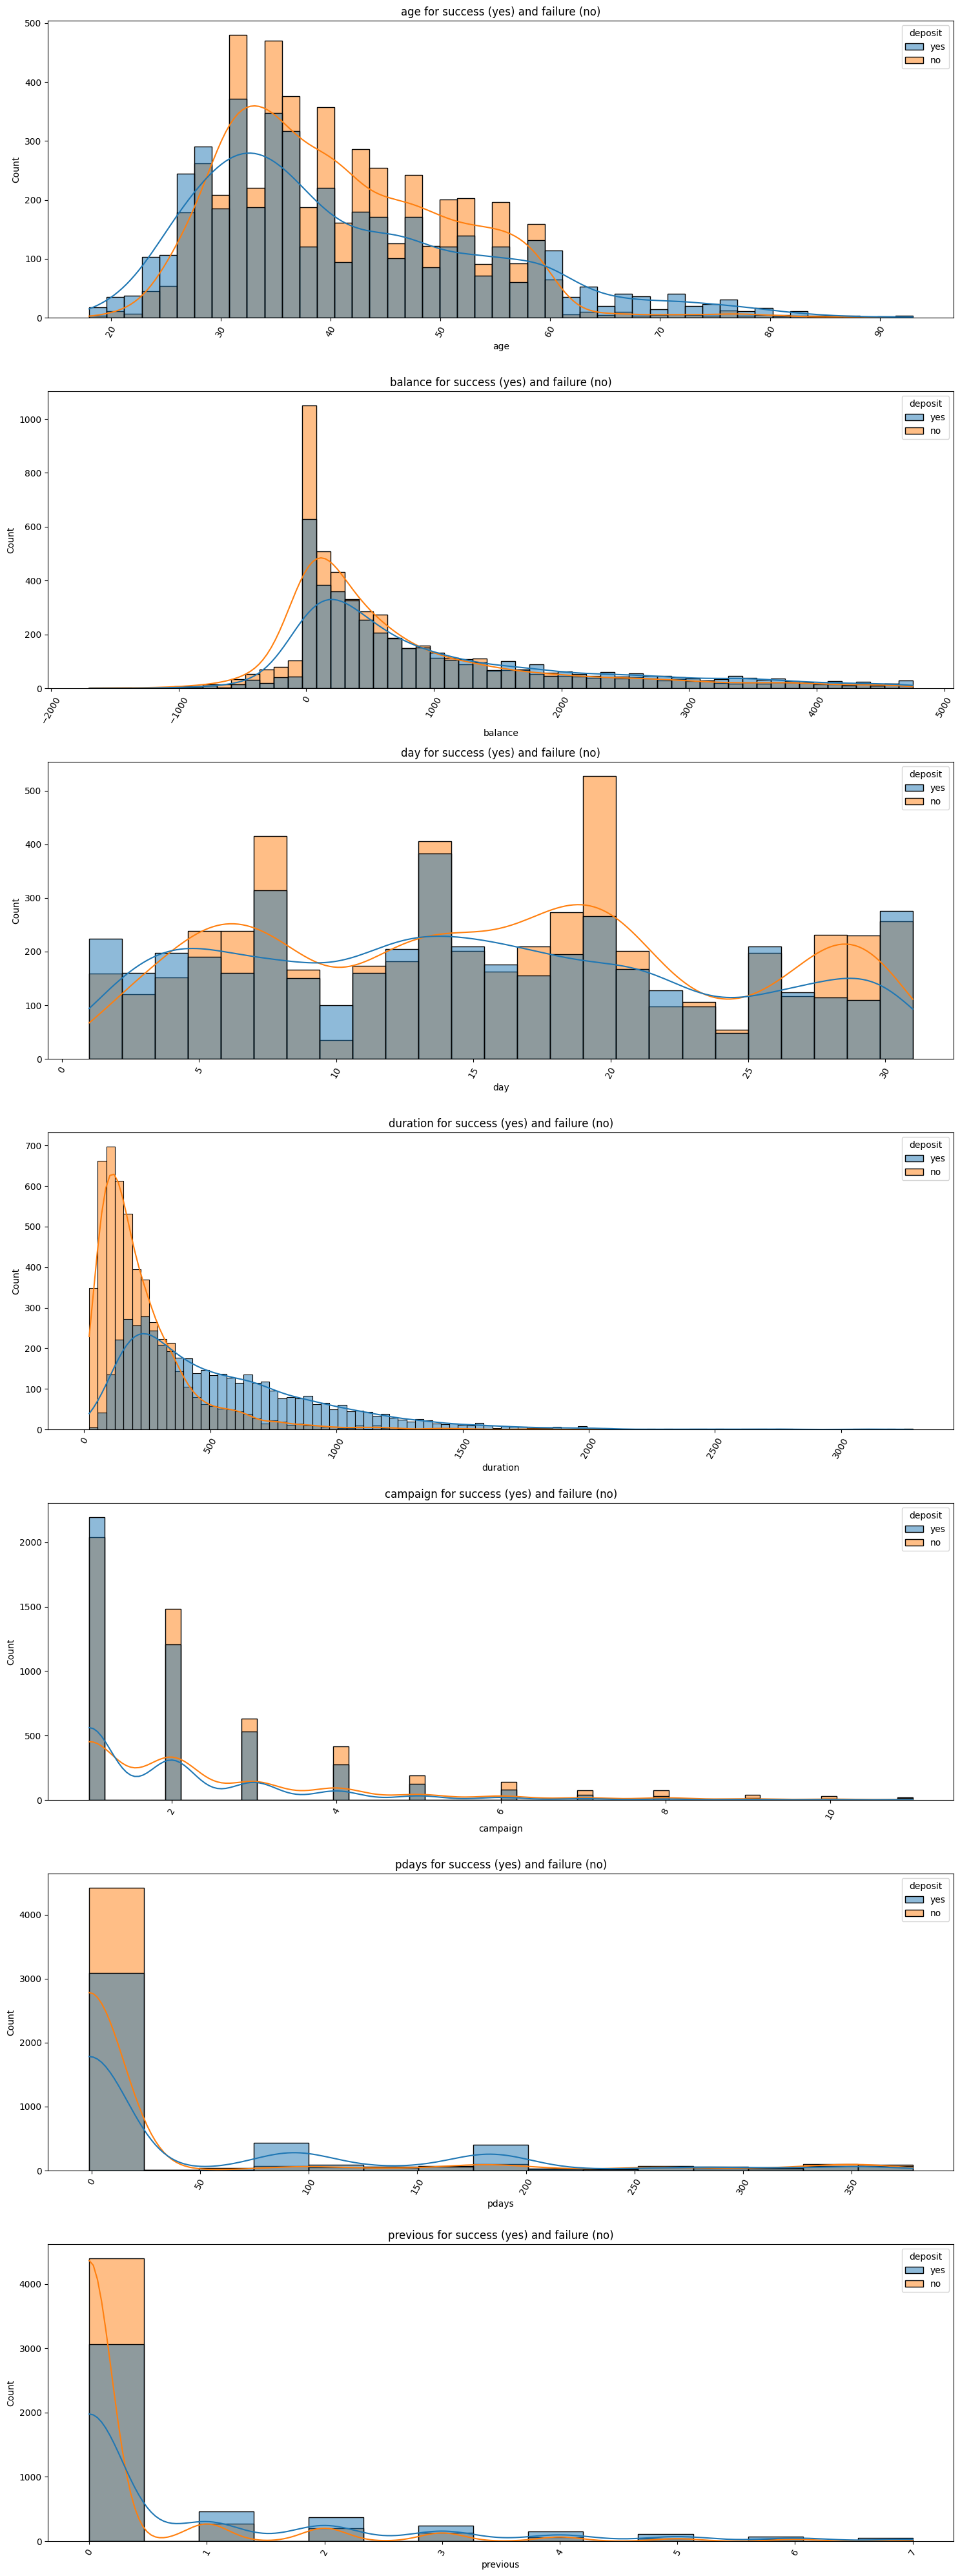

In [664]:
n = len(num_features) #number of numerical features
fig, axes = plt.subplots(n, 1, figsize=(15, 40)) #figure+n*2 coordinate axes with same y-scale
#creating cycle for categorial features
for i, feature in enumerate(num_features):
    #building percented barplots for on the left for clients who did not open deposit (failure)
    count_histplot = sns.histplot(
        data=cleaned,
        x=feature, 
        hue='deposit',
        kde=True,
        ax=axes[i]
        )
    count_histplot.xaxis.set_tick_params(rotation=60)
    count_histplot.set(title=f'{feature} for success (yes) and failure (no)')

plt.tight_layout() #alignment of features

### Key findings:
    - Success rate for opening deposit is much higher with clients whose age is below 30 and above 60;
    - Clients whose balance is above 1000 open deposit more often;
    - The longer bank speaks with the client the higher are chances to persuade;
    

    If we check relation between results of the previous and current campaign we can ensure that the success rate for current is much higher if there was success in previous.

In [665]:
cleaned.groupby(by='poutcome')['deposit'].value_counts()

poutcome  deposit
failure   no          507
          yes         453
other     yes         223
          no          168
success   yes         781
          no           75
unknown   no         4397
          yes        3066
Name: deposit, dtype: int64

    Now let's examine which months were more successful.

In [666]:
cleaned.groupby(by='month')['deposit'].value_counts(normalize=True).sort_values(ascending=False)

month  deposit
dec    yes        0.943820
mar    yes        0.904762
sep    yes        0.853061
oct    yes        0.827044
may    no         0.673115
apr    yes        0.624848
jul    no         0.596870
jan    no         0.592233
nov    no         0.572343
aug    no         0.562112
feb    yes        0.557864
jun    no         0.541867
       yes        0.458133
feb    no         0.442136
aug    yes        0.437888
nov    yes        0.427657
jan    yes        0.407767
jul    yes        0.403130
apr    no         0.375152
may    yes        0.326885
oct    no         0.172956
sep    no         0.146939
mar    no         0.095238
dec    no         0.056180
Name: deposit, dtype: float64

    We've made an assumption that campaign has started in May as during this month there were the largest number of contacts with clients.  Further I'll try to figure out which year that was.

    The most successful months for the bank were in December, March, September and October. More than 80% of contacted clients agreed to open deposit during these months. Worst month was May - when campaign has started. 67% of clients said no to the deposit opening. It seems that campaign was more effective in 6 months after start.

    It seems that students and pensioners open deposit more often. Let's confirm our hypothesis by creating several age categories:

In [667]:
def set_age_cat(age):
    if age < 30:
        return '<30'
    elif 30 <= age < 60:
        return '30-60'
    elif age >= 60:
        return '60+'

cleaned['age_category'] = cleaned['age'].apply(set_age_cat)
cleaned['age_category'].value_counts()

30-60    7634
<30      1397
60+       639
Name: age_category, dtype: int64

    Visualizing age categories.

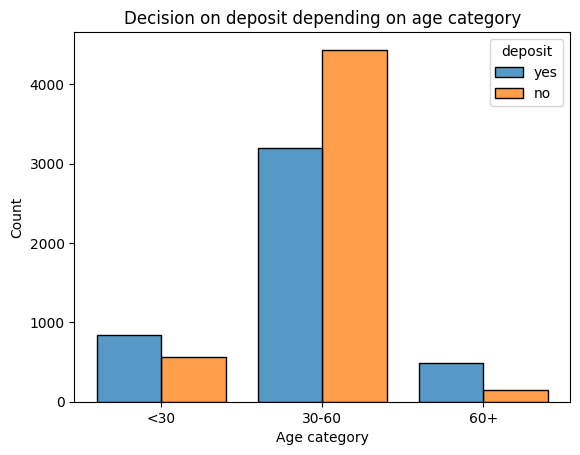

In [668]:
cleaned['age_category'] = pd.Categorical(cleaned['age_category'], ['<30', '30-60', '60+'])
age_histplot = sns.histplot(
    data=cleaned,
    x='age_category', 
    hue='deposit',
    shrink=0.8,
    discrete=True,
    multiple='dodge',
    legend=True)
age_histplot.set(xlabel='Age category')
age_histplot.set(title='Decision on deposit depending on age category');


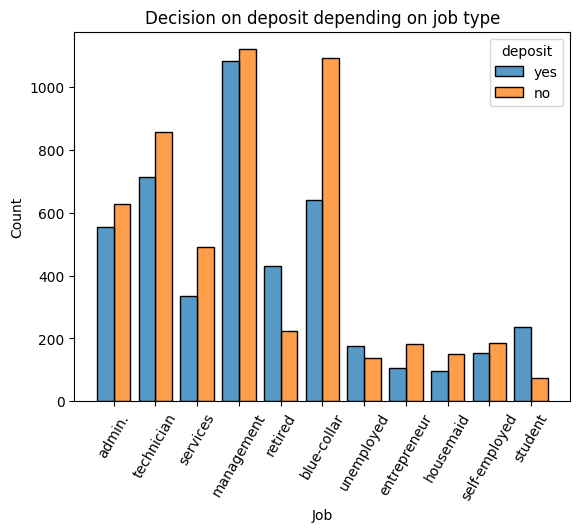

In [669]:
job_histplot = sns.histplot(
    data=cleaned,
    x='job', 
    hue='deposit',
    shrink=0.8,
    discrete=True,
    multiple='dodge',
    legend=True)
job_histplot.set(xlabel='Job')
job_histplot.xaxis.set_tick_params(rotation=60)
job_histplot.set(title='Decision on deposit depending on job type');

    Assumption was correct. Success rate with students and pensioners is higher. Pensioners usually have savings that they want to save. And students might think about their future and open deposits in early age. As clients become older they take loans and dont have extra money which they can put on deposit.

    The third category where success rate is higher than failure is unemployed. Before becoming unemployed people usually receive severance pay that they would like to save.

    We also mentioned that single persons and clients with tertiary education open deposit more often. Let's confirm it with histplots.

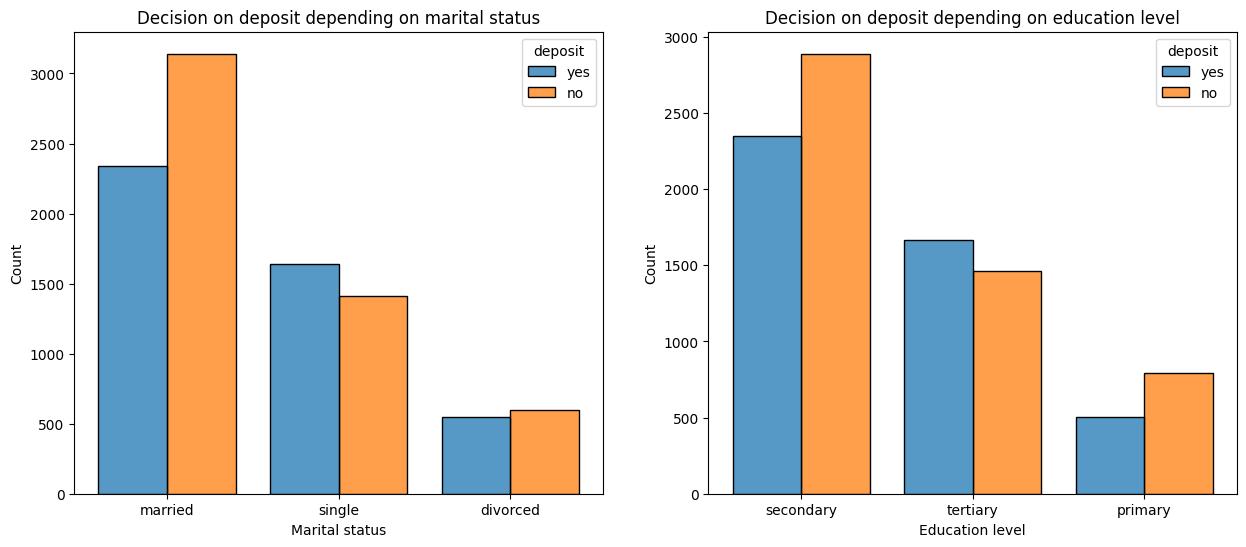

In [670]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
marital_histplot = sns.histplot(
    data=cleaned,
    x='marital', 
    hue='deposit',
    shrink=0.8,
    discrete=True,
    multiple='dodge',
    legend=True,
    ax=axes[0])
marital_histplot.set(xlabel='Marital status')
marital_histplot.set(title='Decision on deposit depending on marital status');

edu_histplot = sns.histplot(
    data=cleaned,
    x='education', 
    hue='deposit',
    shrink=0.8,
    discrete=True,
    multiple='dodge',
    legend=True,
    ax=axes[1])
edu_histplot.set(xlabel='Education level')
edu_histplot.set(title='Decision on deposit depending on education level');

In [671]:
cleaned.groupby(by=['deposit', 'education', 'marital'])['deposit'].count()

deposit  education  marital 
no       primary    divorced      90
                    married      618
                    single        86
         secondary  divorced     348
                    married     1729
                    single       813
         tertiary   divorced     157
                    married      794
                    single       512
yes      primary    divorced      94
                    married      334
                    single        79
         secondary  divorced     278
                    married     1230
                    single       843
         tertiary   divorced     173
                    married      773
                    single       719
Name: deposit, dtype: int64

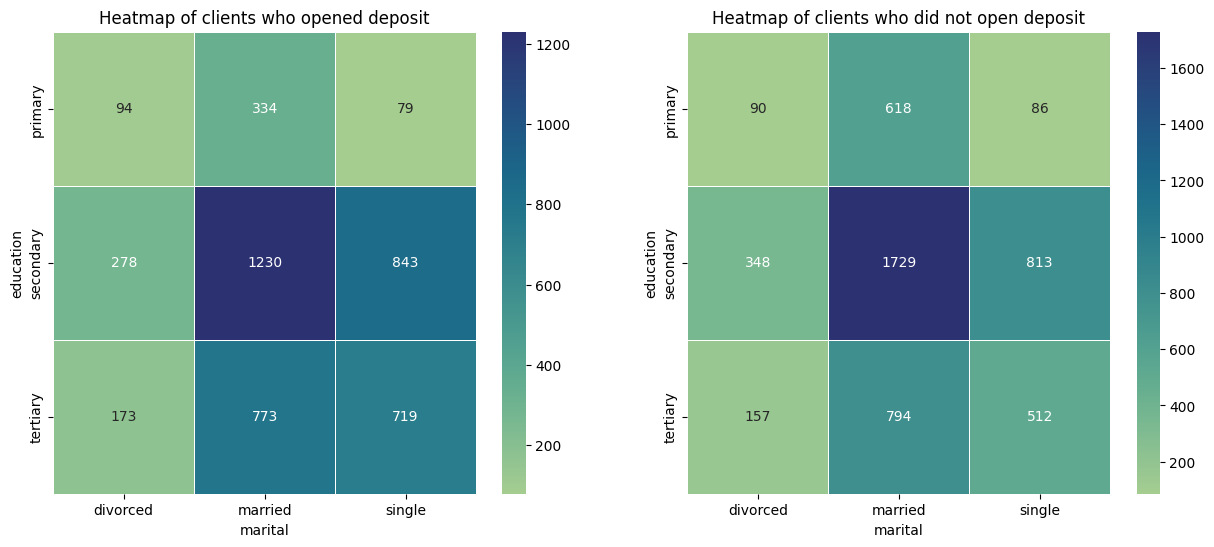

In [672]:
deposit_yes = success.pivot_table(
    index='education', 
    columns='marital', 
    values='deposit', 
    aggfunc='count'
    )
deposit_no = failure.pivot_table(
    index='education', 
    columns='marital', 
    values='deposit', 
    aggfunc='count'
    )
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
heatmap_yes = sns.heatmap(
    deposit_yes, 
    cmap='crest', 
    ax=axes[0], 
    annot=True, 
    linewidth=.5, 
    fmt='.0f'
    )
heatmap_no = sns.heatmap(
    deposit_no, 
    cmap='crest', 
    ax=axes[1], 
    annot=True, 
    linewidth=.5, 
    fmt='.0f'
    )
heatmap_yes.set(
    title='Heatmap of clients who opened deposit'
    )
heatmap_no.set(
    title='Heatmap of clients who did not open deposit'
    );

# <p style="border:3px solid DodgerBlue;text-align:center;font-size:100%;">3. Feature engineering</p> 

### 3.1. 'Day' and 'Month' features

    I'd like to combine month and day features. But we also need year which we don't know. Let's find out.

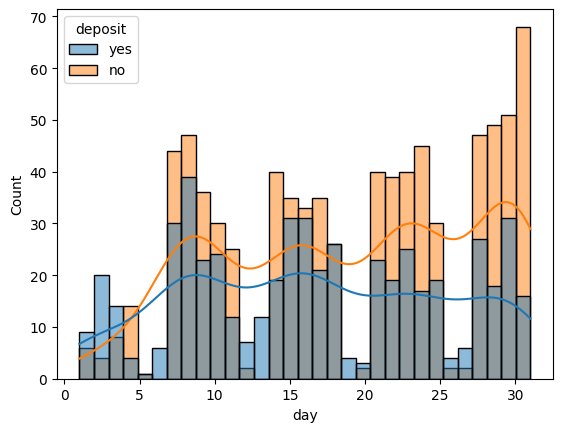

In [673]:
jul_data = cleaned[cleaned['month'] == 'jul']
count_histplot = sns.histplot(
    data=jul_data,
    x='day', 
    hue='deposit',
    kde=True,
    bins=31
    )

    Having evaluated a number of contacts made I've found days with the lowest number of calls. I assume that these are weekends or hoidays and compared this data with calendar. I came to a conclusion that we have data for year 2014. So now we can create 'contact_date' feature.

    But firstly need to change month from 'str' to 'int'.


In [674]:
def get_month(month_name):
    if month_name == 'jan':
        return 1
    elif month_name == 'feb':
        return 2
    elif month_name == 'mar':
        return 3
    elif month_name == 'apr':
        return 4
    elif month_name == 'may':
        return 5
    elif month_name == 'jun':
        return 6
    elif month_name == 'jul':
        return 7
    elif month_name == 'aug':
        return 8
    elif month_name == 'sep':
        return 9
    elif month_name == 'oct':
        return 10
    elif month_name == 'nov':
        return 11
    elif month_name == 'dec':
        return 12
    
cleaned['month'] = cleaned['month'].apply(get_month)
       

    Finally creating 'contact_date' feature

In [675]:
cleaned['contact_date'] = pd.to_datetime(dict(year=2014, month=cleaned.month, day=cleaned.day))

    Also it would be interesting to see in what day of the week the contact was made. I'll make a separate feature for that.

In [676]:
cleaned['contact_dow'] = cleaned['contact_date'].dt.day_of_week

    It might be helpful to see how clients react when they get calls from the bank on weekend. So, let's create 'contact_wknd' feature if the call was on weekend.

In [677]:
cleaned['contact_wknd'] = cleaned['contact_dow'].apply(lambda x: 1 if x == 5 or x == 6 else 0)

In [678]:
cleaned['contact_wknd'].value_counts(normalize=True)

0    0.87001
1    0.12999
Name: contact_wknd, dtype: float64

    13% of calls were on weekends

    We also know that data has come from Russian bank and we can also mark national holidays when people don't work.

In [679]:
def get_holiday(date):
    holidays_2014 = [
        '2014-01-01', '2014-01-02', '2014-01-03',
        '2014-01-06', '2014-01-07', '2014-01-08',
        '2014-03-10', '2014-05-01', '2014-05-02',
        '2014-05-09', '2014-06-12', '2014-06-13',
        '2014-11-03', '2014-11-04'
    ]
    if str(date) in holidays_2014:
        return 1
    else:
        return 0

cleaned['contact_date'] = cleaned['contact_date'].dt.date
cleaned['contact_hld'] = cleaned['contact_date'].apply(get_holiday)

In [680]:
cleaned['contact_hld'].value_counts(normalize=True)

0    0.986039
1    0.013961
Name: contact_hld, dtype: float64

    Only 1% of calls were on holidays. I think it would be better to combine holidays and weekends into one feature 'contact_no_work'

In [681]:
cleaned['contact_no_work'] = cleaned['contact_hld'] + cleaned['contact_wknd']
cleaned['contact_no_work'].value_counts()

0    8278
1    1392
Name: contact_no_work, dtype: int64

    Now let's see success rate for calls on business days and days when people don't work. 

In [682]:
no_work_yes = cleaned[cleaned['contact_no_work'] == 1].pivot_table(
    index='deposit', 
    values='contact_no_work', 
    aggfunc='count'
    )
no_work_yes['chance %'] = no_work_yes['contact_no_work'].apply(lambda x: x/no_work_yes['contact_no_work'].sum() * 100)

no_work_no = cleaned[cleaned['contact_no_work'] == 0].pivot_table(
    index='deposit', 
    values='contact_no_work', 
    aggfunc='count'
    )
no_work_no['chance %'] = no_work_no['contact_no_work'].apply(lambda x: x/no_work_no['contact_no_work'].sum() * 100)

print('Number of clients who opened a deposit after a call on weekend or holiday\n', no_work_yes)
print()
print('Number of clients who opened a deposit after a call on business day\n', no_work_no)

Number of clients who opened a deposit after a call on weekend or holiday
          contact_no_work   chance %
deposit                            
no                   495  35.560345
yes                  897  64.439655

Number of clients who opened a deposit after a call on business day
          contact_no_work   chance %
deposit                            
no                  4652  56.197149
yes                 3626  43.802851


    That's quite noteworthy that calls made on non-working days have bigger chances to result in opening a deposit: 64% versus 43% on business days.

### 3.2. 'Duration' feature

    Previously we've discovered that call duration also has impact on potential decision on opening of deposit. 

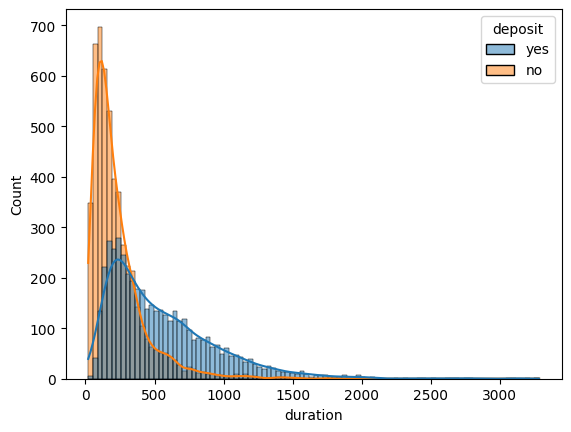

In [683]:
count_histplot = sns.histplot(
    data=cleaned,
    x='duration', 
    hue='deposit',
    kde=True
    )

    Visually we can find on histplot that if call duration is longer than 330 seconds odds rise on deposit opening. I'll create new feature column 'duration>330' with 1 and 0 values (1 is fot those, who had spoken with the bank longer than 330 seconds). 

In [684]:
cleaned['duration>330'] = cleaned['duration'].apply(lambda x: 1 if x>=330 else 0)

### 3.3. 'Balance' feature

    Clients without money rarely think about deposit. That's why it might be beneficial to create 'balance>1000' feature as we previously discovered that clients with more than 1000$ on account open deposit more often.

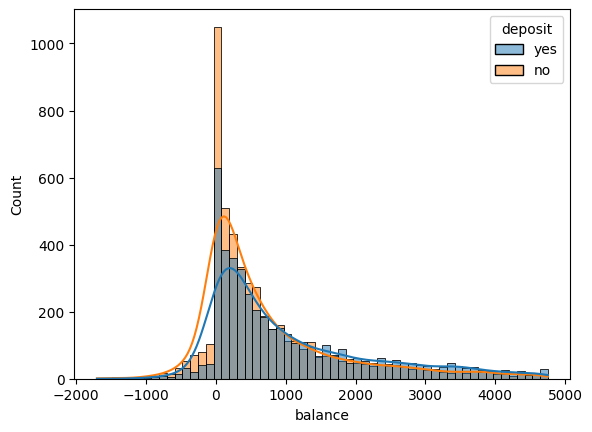

In [685]:
histplot = sns.histplot(
    data=cleaned,
    x='balance', 
    hue='deposit',
    kde=True
    )

In [686]:
cleaned['balance>1000'] = cleaned['balance'].apply(lambda x: 1 if x>=1000 else 0)

    Now it's time to transform all categorial features into numerical using encoders and lambda functions.

    Binary features could be transformed into 1 and 0.

In [687]:
cleaned['deposit'] = cleaned['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
cleaned['default'] = cleaned['default'].apply(lambda x: 1 if x == 'yes' else 0)
cleaned['housing'] = cleaned['housing'].apply(lambda x: 1 if x == 'yes' else 0)
cleaned['loan'] = cleaned['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [688]:
# создайте дамми-переменные
dum = pd.get_dummies(
    cleaned, 
    columns=[
        'job', 
        'marital',
        'education', 
        'contact', 
        'month', 
        'poutcome',
        'age_category'
        ]
    )
dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9670 entries, 0 to 11161
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9670 non-null   int64  
 1   default              9670 non-null   int64  
 2   balance              9670 non-null   float64
 3   housing              9670 non-null   int64  
 4   loan                 9670 non-null   int64  
 5   day                  9670 non-null   int64  
 6   duration             9670 non-null   int64  
 7   campaign             9670 non-null   int64  
 8   pdays                9670 non-null   int64  
 9   previous             9670 non-null   int64  
 10  deposit              9670 non-null   int64  
 11  contact_date         9670 non-null   object 
 12  contact_dow          9670 non-null   int64  
 13  contact_wknd         9670 non-null   int64  
 14  contact_hld          9670 non-null   int64  
 15  contact_no_work      9670 non-null   

### Correlation matrix

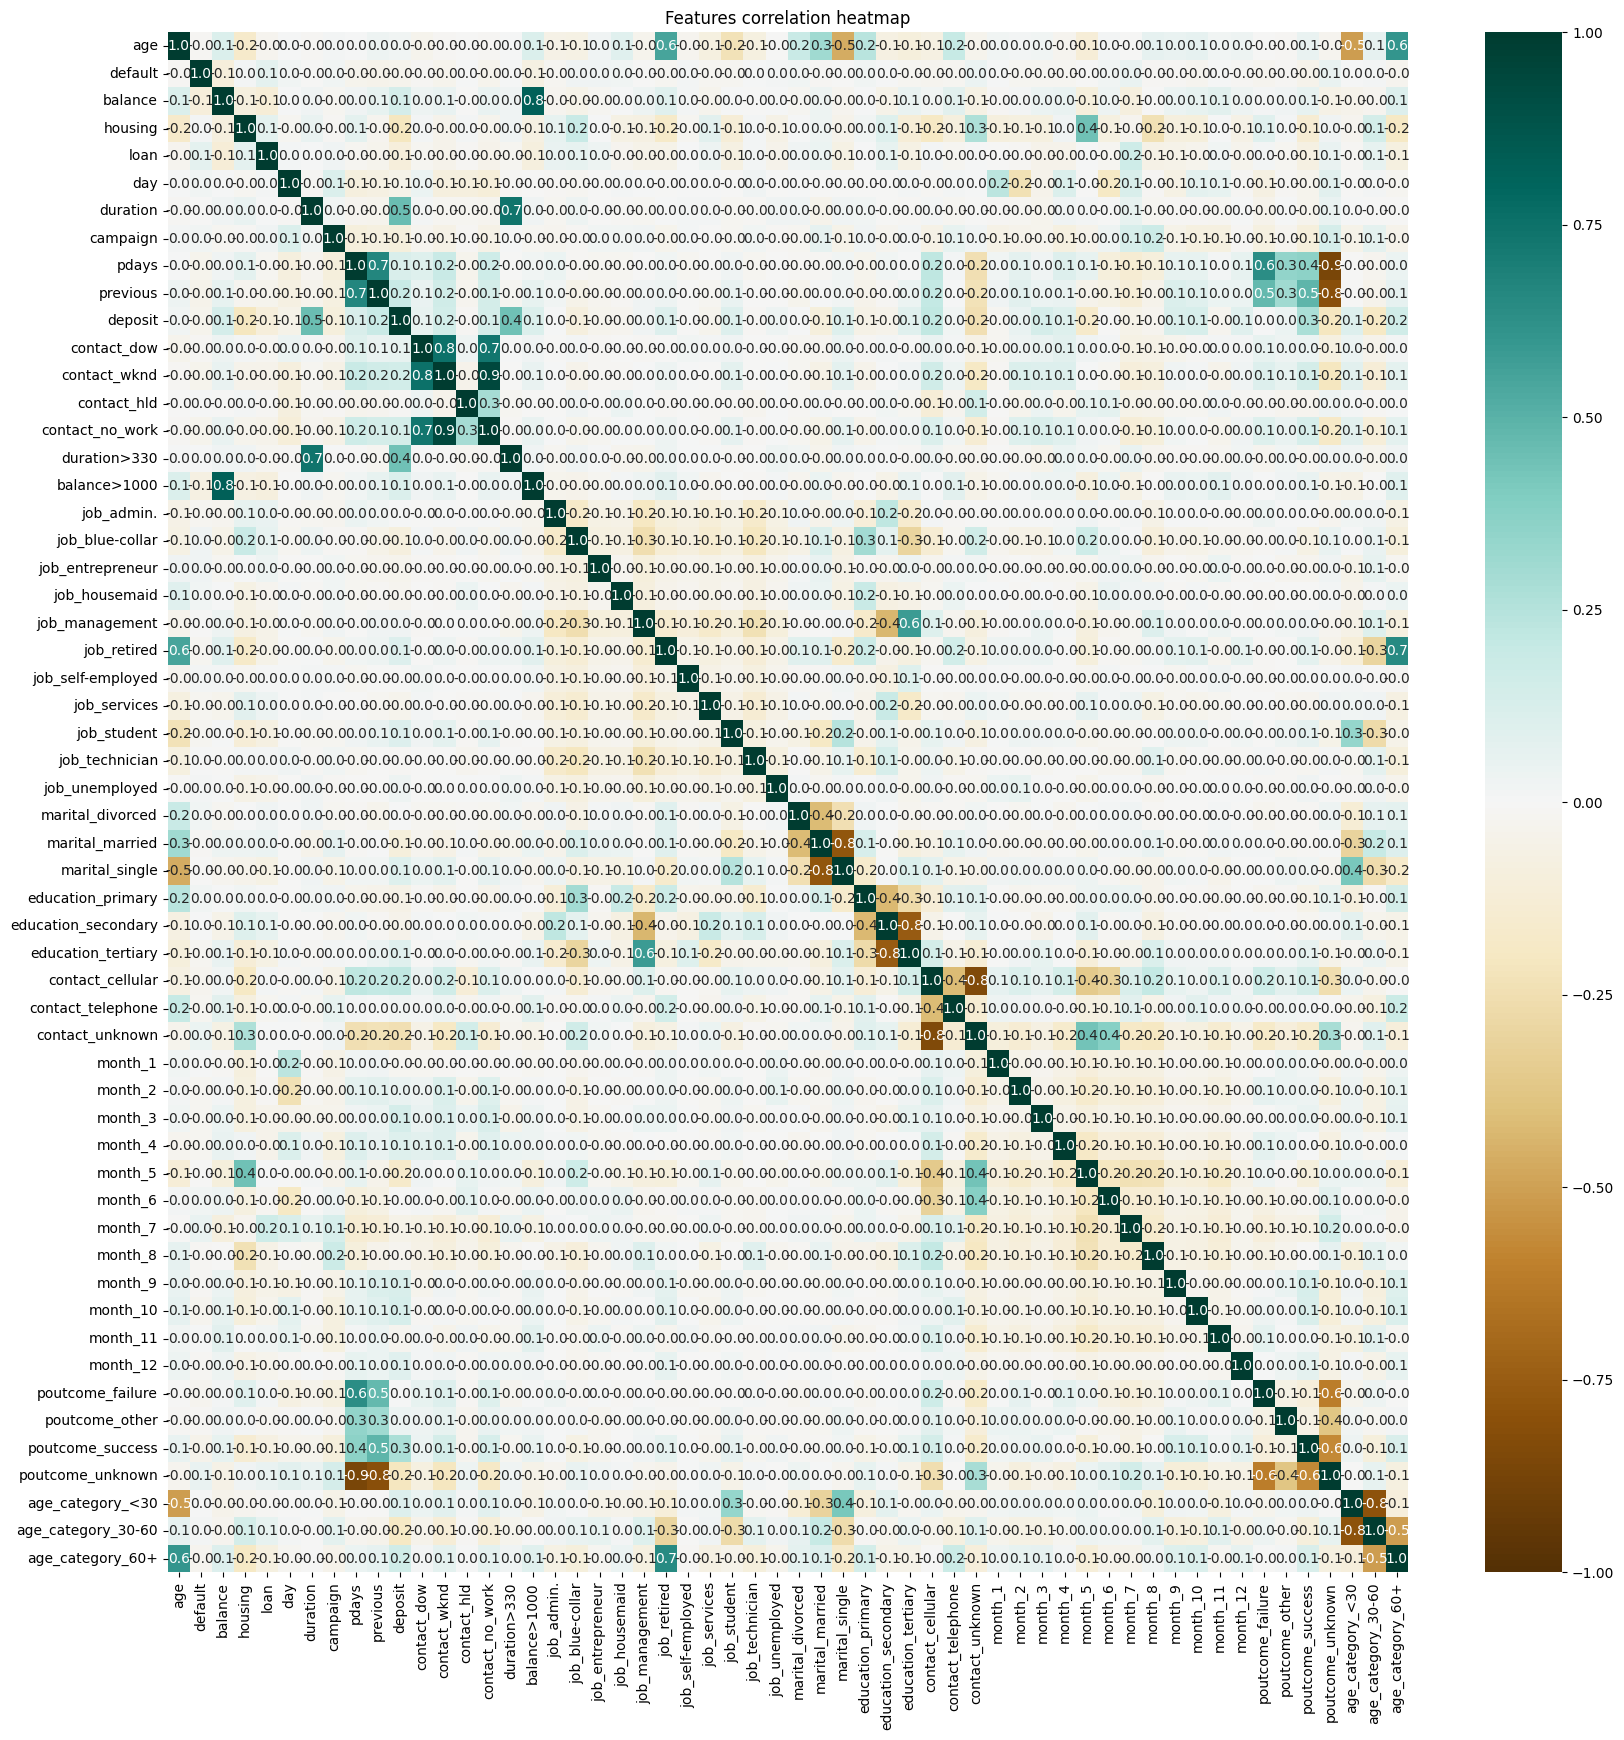

In [689]:
fig = plt.figure(figsize=(20, 20))
heatmap_dum = sns.heatmap(
    dum.corr(), 
    vmin=-1, 
    vmax=1, 
    annot=True, 
    cmap='BrBG', 
    fmt='.1f'
    )
heatmap_dum.set(
    title='Features correlation heatmap'
    );


In [690]:
corr = dum.corr()
corr_unstack = corr.abs().unstack().reset_index()
corr_unstack = corr_unstack.sort_values(by=[0], ascending = False)
mask = corr_unstack['level_0'] != corr_unstack['level_1']
corr_unstack = corr_unstack[mask]
corr_unstack['pr1'] = corr_unstack['level_0'] + corr_unstack['level_1']
corr_unstack['pr1'] = corr_unstack['pr1'].apply(lambda x: ''.join(sorted(list(x))))
corr_unstack = corr_unstack.drop_duplicates(subset=['pr1'])
corr_unstack = corr_unstack.drop(['pr1'], axis=1)
print('Features with highest correlation')
corr_unstack.head(20)

Features with highest correlation


level_0             level_1         0
686          contact_wknd     contact_no_work  0.942617
2920     poutcome_unknown               pdays  0.865336
2050      contact_unknown    contact_cellular  0.840431
898          balance>1000             balance  0.827816
556              previous    poutcome_unknown  0.810236
3077   age_category_30-60    age_category_<30  0.795708
1654      marital_married      marital_single  0.776299
1825  education_secondary  education_tertiary  0.752198
683          contact_wknd         contact_dow  0.751352
351              duration        duration>330  0.740389
795       contact_no_work         contact_dow  0.731322
512              previous               pdays  0.668474
3102     age_category_60+         job_retired  0.656099
497                 pdays    poutcome_failure  0.638548
2796     poutcome_failure    poutcome_unknown  0.610495
55                    age    age_category_60+  0.606175
1209       job_management  education_tertiary  0.585499
2963     poutcome_unknown    poutcome_success  0.573068
1232          job_retired                 age  0.551337
3134     age_category_60+  age_category_30-60  0.515074

    Unnecessary features shall be deleted.

In [691]:
dum = dum.drop(columns=['contact_date', 'contact_dow', 'contact_wknd', 'contact_hld'])

### Задания 7 и 8

In [692]:
X = dum.drop(['deposit'], axis=1)
y = dum['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.2)

### Задание 9

### Задание 10

In [693]:
# нормализуйте данные с помощью minmaxsxaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [694]:
# обучите логистическую регрессию и рассчитайте метрики качества
log_reg = linear_model.LogisticRegression(
    solver='sag', 
    random_state=42, 
    max_iter=1000
    )

log_reg.fit(X_train_scaled, y_train)
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

print(f'Accuracy score for train: {round(metrics.accuracy_score(y_train_pred, y_train), 2)}')
print(f'Accuracy score for test: {round(metrics.accuracy_score(y_test_pred, y_test), 2)}')


Accuracy score for train: 0.83
Accuracy score for test: 0.83


### Задания 2,3,4

In [695]:
# обучите решающие деревья, настройте максимальную глубину
dec_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

dec_tree.fit(X_train_scaled, y_train)
y_train_pred = dec_tree.predict(X_train_scaled)
y_test_pred = dec_tree.predict(X_test_scaled)

print(f'Accuracy score for train: {round(metrics.accuracy_score(y_train_pred, y_train), 2)}')
print(f'Accuracy score for test: {round(metrics.accuracy_score(y_test_pred, y_test), 2)}')

Accuracy score for train: 1.0
Accuracy score for test: 0.8


### Задание 5

In [696]:
param_grid = {
    'min_samples_split': [2, 5, 7, 10],
    'max_depth': [3, 5, 6, 7]
    } 

grid_search = GridSearchCV(
    estimator=dec_tree,
    param_grid=param_grid,
    cv=5,
    n_jobs = -1
)  
%time 
grid_search.fit(X_train_scaled, y_train) 
y_train_pred = grid_search.predict(X_train_scaled)
y_test_pred = grid_search.predict(X_test_scaled)

print(f'Accuracy score for train: {round(metrics.accuracy_score(y_train_pred, y_train), 2)}')
print(f'Accuracy score for test: {round(metrics.accuracy_score(y_test_pred, y_test), 2)}')
print(f'F1 score for train: {round(metrics.f1_score(y_train_pred, y_train), 2)}')
print(f'F1 score for test: {round(metrics.f1_score(y_test_pred, y_test), 2)}')
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 20.7 µs
Accuracy score for train: 0.83
Accuracy score for test: 0.82
F1 score for train: 0.83
F1 score for test: 0.82
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 2}


In [697]:
dec_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42, 
    max_depth=7,
    min_samples_split=10
)

dec_tree.fit(X_train_scaled, y_train)
y_train_pred = dec_tree.predict(X_train_scaled)
y_test_pred = dec_tree.predict(X_test_scaled)

print(f'F1 score for train: {round(metrics.f1_score(y_train_pred, y_train), 2)}')
print(f'F1 score for test: {round(metrics.f1_score(y_test_pred, y_test), 2)}')

F1 score for train: 0.83
F1 score for test: 0.82


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [698]:
# обучите на ваших данных случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)

rf.fit(X_train_scaled, y_train)
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

print(f'Accuracy score for train: {round(metrics.accuracy_score(y_train_pred, y_train), 2)}')
print(f'Accuracy score for test: {round(metrics.accuracy_score(y_test_pred, y_test), 2)}')
print(f'Recall score for train: {round(metrics.recall_score(y_train_pred, y_train), 2)}')
print(f'Recall score for test: {round(metrics.recall_score(y_test_pred, y_test), 2)}')

Accuracy score for train: 0.86
Accuracy score for test: 0.85
Recall score for train: 0.83
Recall score for test: 0.82


### Задания 2 и 3

In [699]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
gb = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)
%time gb.fit(X_train_scaled, y_train)
y_train_pred = gb.predict(X_train_scaled)
y_test_pred = gb.predict(X_test_scaled)
print(f'Classification report for train:\n {metrics.classification_report(y_train_pred, y_train)}')
print(f'Classification report for test:\n {metrics.classification_report(y_test_pred, y_test)}')

CPU times: user 39min 28s, sys: 509 ms, total: 39min 29s
Wall time: 39min 30s
Classification report for train:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      3954
           1       0.93      0.89      0.91      3782

    accuracy                           0.91      7736
   macro avg       0.91      0.91      0.91      7736
weighted avg       0.91      0.91      0.91      7736

Classification report for test:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       987
           1       0.88      0.84      0.86       947

    accuracy                           0.86      1934
   macro avg       0.87      0.86      0.86      1934
weighted avg       0.87      0.86      0.86      1934



### Задание 4

In [700]:
# объедините уже известные вам алгоритмы с помощью стекинга 
estimators = [
    ('lr', log_reg),
    ('dt', dec_tree),
    ('gb', gb),
    ('rf', rf)    
]
#Создаем объект класса стекинг
reg = ensemble.StackingClassifier(
    estimators=estimators,
    final_estimator=log_reg
)
#Обучаем модель
reg.fit(X_train_scaled, y_train)
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)
print(f'Classification report for train:\n {metrics.classification_report(y_train_pred, y_train)}')
print(f'Classification report for test:\n {metrics.classification_report(y_test_pred, y_test)}')
print(f'Precision score for train: {round(metrics.precision_score(y_train_pred, y_train), 2)}')
print(f'Precision score for test: {round(metrics.precision_score(y_test_pred, y_test), 2)}')

Classification report for train:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      3968
           1       0.92      0.88      0.90      3768

    accuracy                           0.90      7736
   macro avg       0.90      0.90      0.90      7736
weighted avg       0.90      0.90      0.90      7736

Classification report for test:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       988
           1       0.88      0.84      0.86       946

    accuracy                           0.86      1934
   macro avg       0.86      0.86      0.86      1934
weighted avg       0.86      0.86      0.86      1934

Precision score for train: 0.92
Precision score for test: 0.88


### Задание 5

In [ ]:
job_histplot = sns.histplot(
    data=cleaned,
    x='job', 
    hue='deposit',
    shrink=0.8,
    discrete=True,
    multiple='dodge',
    legend=True)
job_histplot.set(xlabel='Job')
job_histplot.xaxis.set_tick_params(rotation=60)
job_histplot.set(title='Decision on deposit depending on job type');

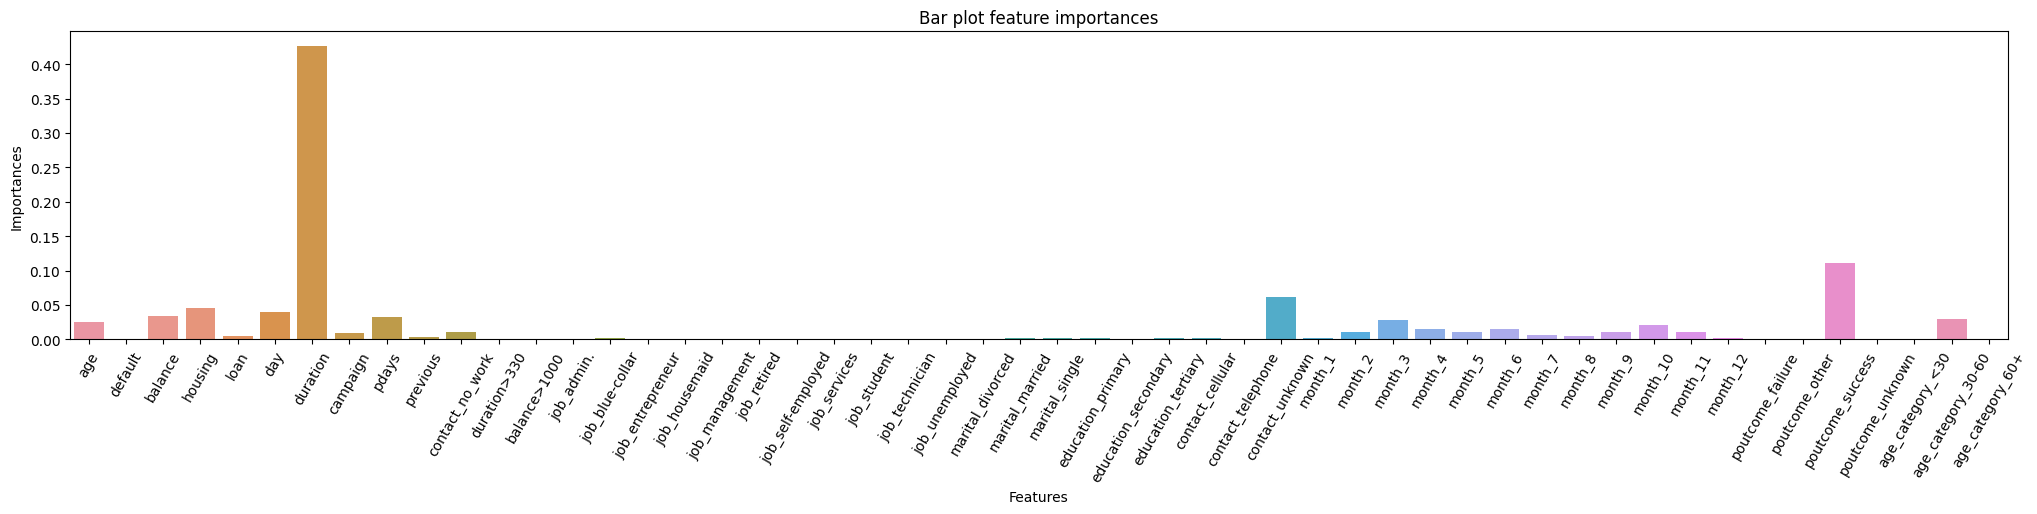

In [712]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
feature = X_train.columns

feature_importances = gb.feature_importances_ #важность признаков
#Строим столбчатую диаграмму

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 4))
feature_barplot = sns.barplot(x=feature, y=feature_importances);
#Добавляем подпись графику, осям абцисс и ординат
feature_barplot.set_title('Bar plot feature importances')
feature_barplot.xaxis.set_tick_params(rotation=60)
feature_barplot.set_xlabel('Features')
feature_barplot.set_ylabel('Importances');

### Задания 6,7,8

In [704]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
import optuna

def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

[I 2023-02-27 10:05:50,103] A new study created in memory with name: RandomForestClassifier
[I 2023-02-27 10:07:52,720] Trial 0 finished with value: 0.9408435520819296 and parameters: {'n_estimators': 116, 'max_depth': 18, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9408435520819296.
[I 2023-02-27 10:10:33,901] Trial 1 finished with value: 0.8643708609271523 and parameters: {'n_estimators': 161, 'max_depth': 17, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.9408435520819296.
[I 2023-02-27 10:12:30,198] Trial 2 finished with value: 0.875 and parameters: {'n_estimators': 116, 'max_depth': 21, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9408435520819296.
[I 2023-02-27 10:14:41,454] Trial 3 finished with value: 0.8684593985958406 and parameters: {'n_estimators': 133, 'max_depth': 17, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9408435520819296.
[I 2023-02-27 10:16:59,176] Trial 4 finished with value: 0.9033970276008494 and parameters: {'n_estimators':

Наилучшие значения гиперпараметров {'n_estimators': 100, 'max_depth': 30, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.95


In [707]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.86
f1_score на тестовом наборе: 0.85
